In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv

In [2]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,n = ([] for i in range(18))

with open('Ruter_data.csv') as file:
    
    reader = csv.reader(file, delimiter=";")
    
    for i in reader:
        A.append(i[ 0]) #TurId
        B.append(i[ 1]) #Dato
        C.append(i[ 2]) #Fylke
        D.append(i[ 3]) #Område
        E.append(i[ 4]) #Kommune
        F.append(i[ 5]) #Holdeplass_Fra
        G.append(i[ 6]) #Holdeplass_Til
        H.append(i[ 7]) #Linjetype
        I.append(i[ 8]) #Linjefylke
        J.append(i[ 9]) #Linjenavn
        K.append(i[10]) #Linjeretning
        L.append(i[11]) #Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra
        M.append(i[12]) #Tidspunkt_Faktisk_Avgang_Holdeplass_Fra
        N.append(i[13]) #Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra
        O.append(i[14]) #Tidspunkt_Planlagt_Avgang_Holdeplass_Fra
        P.append(i[15]) #Kjøretøy_Kapasitet
        Q.append(i[16]) #Passasjerer_Ombord
        
#Creates a list containing int 1 - 6000        
for i in range(len(Q)-1):
    n.append(i+1) 

In [3]:
def timetoint(X): # X is a list with entries of type 00:00:00

    S = []
    
    for i in range(len(X)-1):
        if len(X[i+1]) != 8:
            S.append(999999)
        else:
            ( h , m , s ) = X[i+1].split(':')
            t = int(h) * 3600 + int(m) * 60 + int(s)
            S.append(t)

    return S

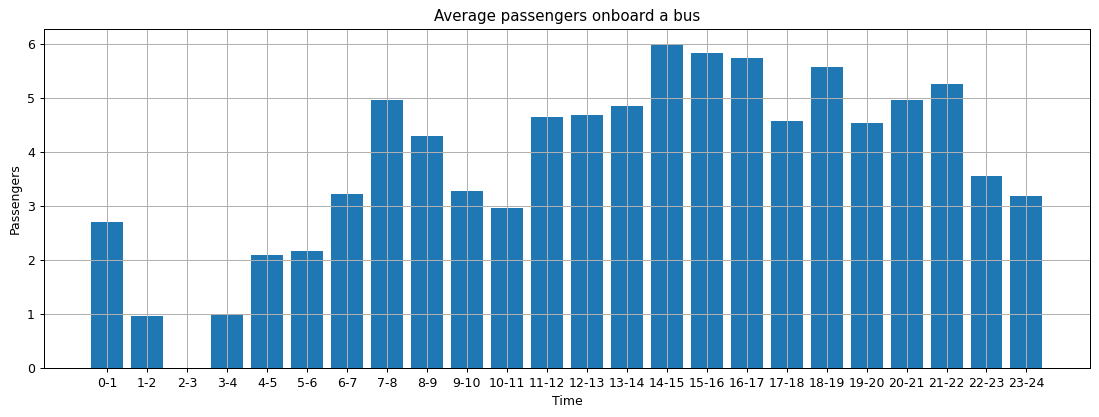

In [4]:
tally = np.zeros(( 24 , 2 ))
pos = list(range(0, 24))
time = timetoint(O)
labels = []

for i in range(len(O)-1):
    time[i] = time[i] - 86400 if time[i] > 86400 else time[i]
    for j in range(24):
        if j <= time[i] / 3600 <= j+1:
            tally[j,0] += int(Q[i+1])
            tally[j,1] += 1
            
for i in range(24):
    labels.append( str(i) + '-' + str(i+1) )

plt.figure( figsize = ( 15 , 5) , dpi = 90 )
plt.bar(pos, (tally[:,0] / tally[:,1]))
plt.xticks(pos, labels)
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.title("Average passengers onboard a bus")
plt.grid()
plt.show()

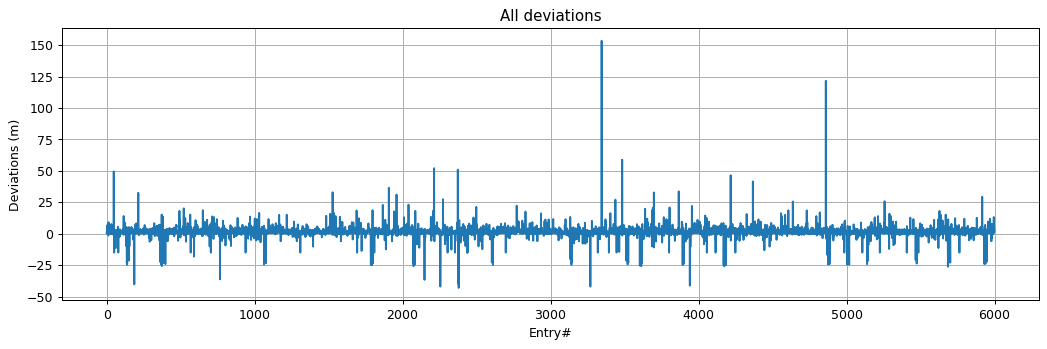

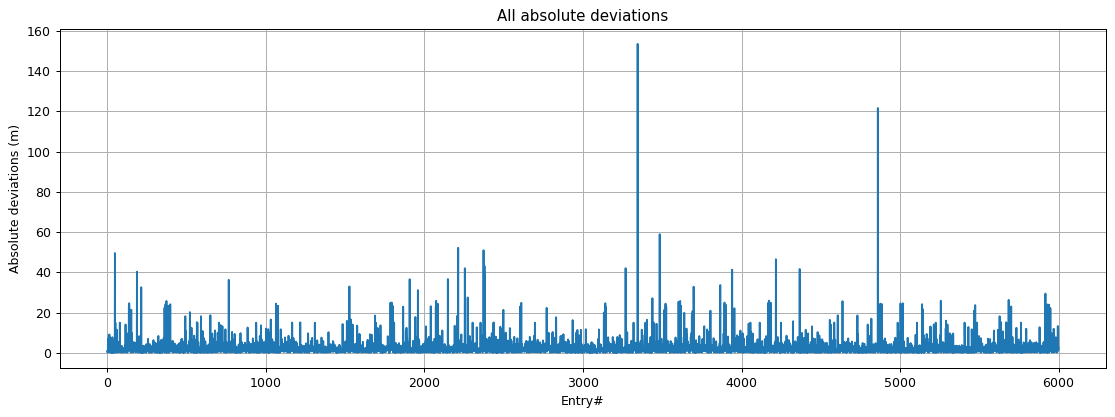

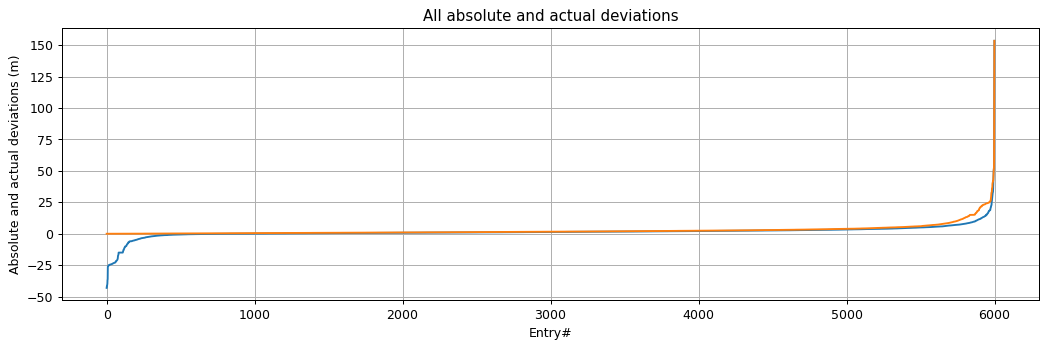

In [18]:
avvik = [0] * 6000
absavvik = []
NS = timetoint(N)
LS = timetoint(L)

for i in range(len(N)-1):
    if LS[i] != 999999:
        avvik[i]=((LS[i]-NS[i])/60)

for i in range(len(avvik)):
    absavvik.append(abs(avvik[i])) 
        
plt.figure( figsize = ( 14 , 4 ) , dpi = 90 )
plt.plot(avvik)
plt.xlabel("Entry#")
plt.ylabel("Deviations (m)")
plt.title("All deviations")
plt.grid()
plt.show()
             
plt.figure( figsize = ( 15 , 5 ) , dpi = 90 )
plt.plot(absavvik)
plt.xlabel("Entry#")
plt.ylabel("Absolute deviations (m)")
plt.title("All absolute deviations")
plt.grid()
plt.show()

for i in range(len(avvik)-1): 
    for j in range(0, len(avvik)-i-1): 
        if avvik[j] > avvik[j+1]: 
            avvik[j], avvik[j+1] = avvik[j+1], avvik[j] 
        if absavvik[j] > absavvik[j+1]: 
            absavvik[j], absavvik[j+1] = absavvik[j+1], absavvik[j] 

            
plt.figure( figsize = ( 14 , 4 ) , dpi = 90 )
plt.plot(avvik)
plt.plot(absavvik)
plt.xlabel("Entry#")
plt.ylabel("Absolute and actual deviations (m)")
plt.title("All absolute and actual deviations")
plt.grid()
plt.show()

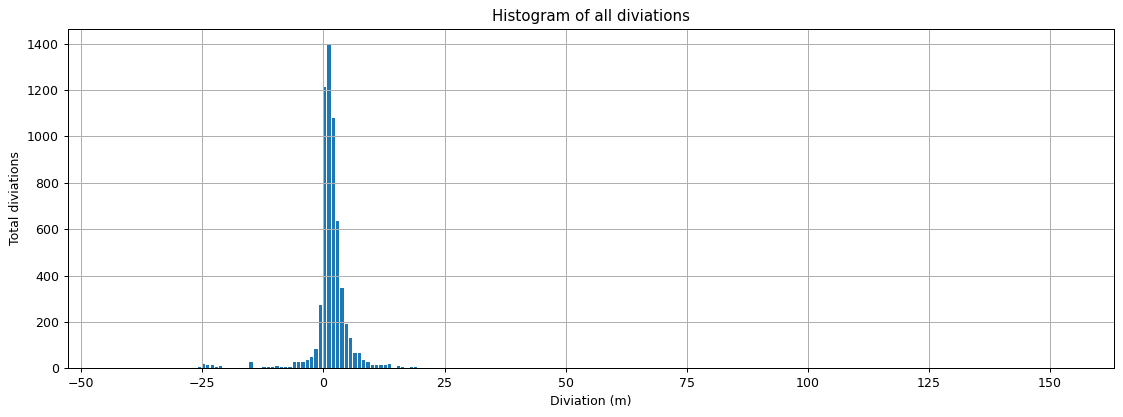

In [6]:
plt.figure( figsize = ( 15 , 5 ) , dpi = 90 )
plt.hist(avvik, bins = 220, rwidth=0.75)
plt.xlabel("Diviation (m)")
plt.ylabel("Total diviations")
plt.title("Histogram of all diviations")
plt.grid()
plt.show()

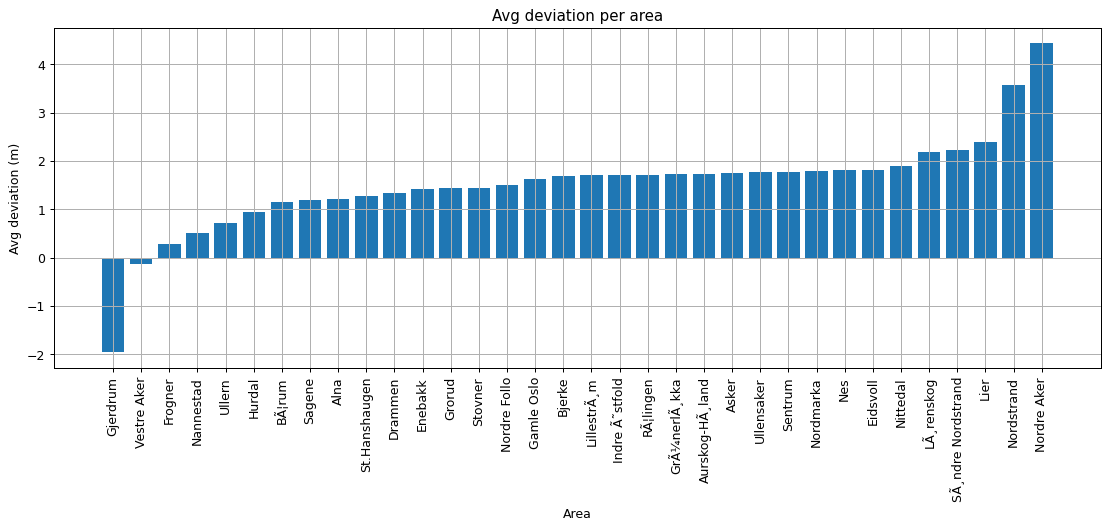

In [7]:
kommuner = []

for i in range(len(E)-1):
    if E[i+1] not in kommuner:
        kommuner.append(E[i+1])

temp = np.zeros((len(kommuner),2))
pos = list(range(0,len(kommuner)))
        
for i in range(len(E)-1):
    for j in range(len(kommuner)):
        if E[i] == kommuner[j]:
            temp[j,0] += 1
            temp[j,1] += avvik[i]
            
for i in range(len(kommuner)-1): 
    for j in range(0, len(kommuner)-i-1): 
        if (temp[j,1]/temp[j,0]) > (temp[j+1,1]/temp[j+1,0]): 
            temp[j,1], temp[j+1,1] = temp[j+1,1], temp[j,1] 
            temp[j,0], temp[j+1,0] = temp[j+1,0], temp[j,0]
            kommuner[j], kommuner[j+1] = kommuner[j+1], kommuner[j]
    
plt.figure( figsize = ( 15 , 5) , dpi = 90 )
plt.bar(pos, (temp[:,1]/temp[:,0]))
plt.xticks(pos, kommuner, rotation=90)
plt.xlabel("Area")
plt.ylabel("Avg deviation (m)")
plt.title("Avg deviation per area")
plt.grid()
plt.show()

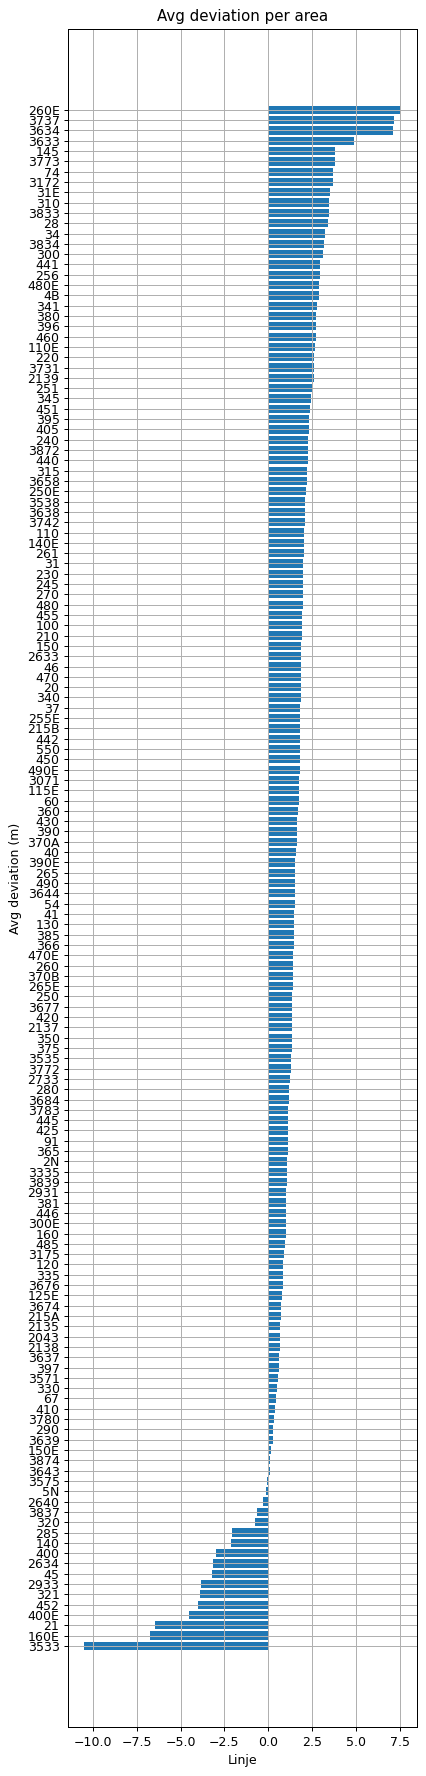

In [8]:
linje = []

for i in range(len(J)-1):
    if J[i+1] not in linje:
        linje.append(J[i+1])

temp = np.zeros((len(linje),2))
pos = list(range(0,len(linje)))

for i in range(len(E)-1):
    for j in range(len(linje)):
        if J[i] == linje[j]:
            temp[j,0] += 1
            temp[j,1] += avvik[i]
            
for i in range(len(linje)-1): 
    for j in range(0, len(linje)-i-1): 
        if (temp[j,1]/temp[j,0]) > (temp[j+1,1]/temp[j+1,0]): 
            temp[j,1], temp[j+1,1] = temp[j+1,1], temp[j,1] 
            temp[j,0], temp[j+1,0] = temp[j+1,0], temp[j,0]
            linje[j], linje[j+1] = linje[j+1], linje[j]
    
            
plt.figure( figsize = ( 5, 25) , dpi = 90 )
plt.barh(linje, (temp[:,1]/temp[:,0]))
plt.xlabel("Linje")
plt.ylabel("Avg deviation (m)")
plt.title("Avg deviation per area")
plt.grid()
plt.show()